# Guided Capstone Step 4. Pre-Processing and Training Data Development

**The Data Science Method**  


1.   Problem Identification 


2.   Data Wrangling 
  
 
3.   Exploratory Data Analysis   

4.   **Pre-processing and Training Data Development**  
 * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 3 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
path = 'C:\\Users\\ualbertin\\Documents\\Springboard\\Capstone1-SkiArea'
os.chdir(path) 
os.listdir()

['.ipynb_checkpoints',
 'data',
 'figures',
 'GuidedCapstoneStep3HL.ipynb',
 'GuidedCapstoneStep4 and step5HL.ipynb',
 'GuidedCapstoneStep6HL.ipynb',
 'models',
 'Nandi_GuidedCapstone2.ipynb',
 'step3_output.csv',
 'updated_ski_data.csv']

**<font color='teal'>  Load the csv file you created in step 3, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df=pd.read_csv('data/step3_output.csv')
df.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1


## Create dummy features for categorical variables

**<font color='teal'> Create dummy variables for `state`. Add the dummies back to the dataframe and remove the original column for `state`. </font>**

Hint: you can see an example of how to execute this in Aiden's article on preprocessing [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967). 

In [4]:
df = pd.concat([df.drop(['state'], axis=1), pd.get_dummies(df.state)], axis=1) # select state column to drop
df.head(10)

,Name,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters,Alaska,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Ohio,Oregon,Pennsylvania,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alyeska Resort,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.000000,150.000000,60.0,669.0,65.000000,85.00000,150.0,550.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.000000,45.000000,44.0,350.0,47.000000,53.00000,90.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.000000,150.000000,36.0,69.0,30.000000,34.00000,152.0,30.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.000000,122.000000,81.0,260.0,89.000000,89.00000,122.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,9200,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.000000,115.000000,49.0,250.0,74.000000,78.00000,104.0,80.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Yosemite Ski & Snowboard Area,7800,600,7200,0,0.0,0,0,0,1,3,1,5,10.0,2.0,0.4,88.0,174.873239,110.000000,84.0,300.0,47.000000,47.00000,107.0,0.0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Bear Mountain,8805,1665,7140,0,0.0,0,2,1,2,3,4,12,27.0,14.0,1.5,198.0,198.000000,122.000000,76.0,100.0,57.916957,64.16681,130.0,0.0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Bear Valley,8500,1900,6600,0,0.0,1,1,0,2,4,2,10,67.0,2.0,1.2,1680.0,100.000000,165.000000,52.0,359.0,57.916957,64.16681,151.0,0.0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Boreal Mountain Resort,7700,500,7200,0,0.0,0,1,1,3,1,2,8,33.0,6.0,1.0,380.0,200.000000,150.000000,54.0,400.0,49.000000,64.16681,150.0,200.0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Dodge Ridge,8200,1600,6600,0,0.0,0,0,1,2,5,4,12,67.0,5.0,2.0,862.0,174.873239,115.103943,69.0,350.0,78.000000,78.00000,140.0,0.0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Standardize the magnitude of numeric features

**<font color='teal'> Using sklearn preprocessing standardize the scale of the features of the dataframe except the name of the resort which we done't need in the dataframe for modeling, so it can be droppped here as well. Also, we want to hold out our response variable(s) so we can have their true values available for model performance review. Let's set `AdultWeekend` to the y variable as our response for scaling and modeling. Later we will go back and consider the `AdultWeekday`, `dayOpenLastYear`, and `projectedDaysOpen`. For now leave them in the development dataframe. </font>**

In [5]:
# first we import the preprocessing package from the sklearn library
from sklearn.preprocessing import StandardScaler

# Step 1. Call the variable corr_matrix
#corr_matrix = dfno.drop(['AdultWeekday','AdultWeekend','daysOpenLastYear','projectedDaysOpen'], axis=1).corr().abs()
# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Name','AdultWeekend','AdultWeekday','daysOpenLastYear','projectedDaysOpen'], axis=1)
#X = df.drop(['Name','AdultWeekend'], axis=1) #despite the instructions given, this does not give the correct answer
# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df.AdultWeekend 

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

## Split into training and testing datasets

**<font color='teal'> Using sklearn model selection import train_test_split, and create a 75/25 split with the y = `AdultWeekend`. We will start by using the adult weekend ticket price as our response variable for modeling.</font>**

In [6]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

Here we start the actual modeling work. First let's fit a multiple linear regression model to predict the `AdultWeekend` price.

# Guided Capstone Step 5. Modeling


This is the fifth step in the Data Science Method. In the previous steps you cleaned and prepared the datasets. Now it's time to get into the most exciting part: modeling! In this exercise, you'll build three different models and compare each model's performance. In the end, you'll choose the best model for demonstrating insights to Big Mountain management.



### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Fit Models with a Training Dataset

**<font color='teal'> Using sklearn, fit the model on your training dataset.</font>**

#### Model 1

In [7]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

**<font color='teal'> Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. The explained variance is a measure of the variation explained by the model. This is also known as the R-squared value. </font>**

Hint: you will have to use the `predict()` method here as it's used in this [DSM article](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b) about modeling. 

In [8]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model.predict(X_test)

## Review Model Outcomes — Iterate over additional models as needed

In [9]:
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics. 
# You can plug y_test and y_pred into the functions to evaluate the model

In [10]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
ev1=explained_variance_score(y_test,y_pred)
mae1=mean_absolute_error(y_test,y_pred)
print('explained variance = ' + str(ev1))
print('mean absolute error = ' + str(mae1))
print(lm.intercept_)

explained variance = 0.3863084985672324
mean absolute error = 13.775708050471213
64.31026868413025


**<font color='teal'> Print the intercept value from the linear model. </font>**

Hint: our linear regression model `lm` has an attribute `intercept_` for the intercept

In [28]:
print(lm.intercept_)

64.31026868413025


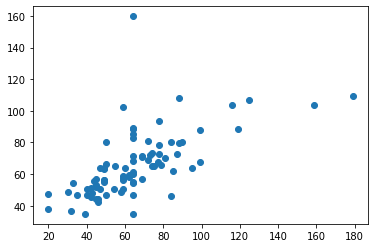

In [12]:
plt.scatter(y_test,y_pred) #Check that model looks like a 45 degree line ish

**<font color='teal'> The intercept is the mean `AdultWeekend` price for all the resorts given the other characteristics. The addition or subtraction of each of the coefficient values in the regression are numeric adjustments applied to the intercept to provide a particular observation's value for the resulting `AdultWeekend` value. Also, because we took the time to scale our x values in the training data, we can compare each of the coeeficients for the features to determine the feature importances. Print the coefficient values from the linear model and sort in descending order to identify the top ten most important features.</font>** 


Hint: make sure to review the absolute value of the coefficients, because the adjustment may be positive or negative, but what we are looking for is the magnitude of impact on our response variable.

In [13]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
lm_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
lm_df.sort_values(by=['Coefficient'],ascending=False ).head(10)

,Coefficient
New York,2.228158e+12
Michigan,2.102777e+12
total_chairs,1.920077e+12
Colorado,1.852668e+12
California,1.813008e+12
Pennsylvania,1.730087e+12
Wisconsin,1.595276e+12
New Hampshire,1.595276e+12
Vermont,1.547076e+12
Minnesota,1.496988e+12


**<font color='teal'>You should see that the top ten important features are different states. However, the state is not something the managers at the Big Mountain Resort can do anything about. Given that we care more about actionable traits associated with ticket pricing, rebuild the model without the state features and compare the results. </font>**

Hint: Try to construct another model using exactly the steps we followed above. 

#### Model 2

In [14]:
# Declare an explanatory variable, called X2 ,and assign it the result of dropping 'state', Name' and 'AdultWeekend' from the df
df2 = df.iloc[:, 0:26] #dropping states
X2 = df2.drop(['Name','AdultWeekend','AdultWeekday','daysOpenLastYear','projectedDaysOpen'], axis=1)
#X2 = df2.drop(['Name','AdultWeekend'], axis=1)
# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y2 = df2.AdultWeekend 
# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = StandardScaler().fit(X2)
# Declare a variable called X2_scaled, and assign it the result of calling the transform() method with parameter X2 
X2_scaled=scaler.transform(X2)
# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y2 = y2.ravel()
# Call the train_test_split() function with the first two parameters set to X2_scaled and y2
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.25, random_state=1)
#lm2 = linear_model.LinearRegression()
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X2_train,y2_train)
y2_pred = model2.predict(X2_test)

In [15]:
ev2=explained_variance_score(y2_test,y2_pred)
mae2=mean_absolute_error(y2_test,y2_pred)
print('explained variance = ' + str(ev2))
print('mean absolute error = ' + str(mae2))
print(lm2.intercept_)

explained variance = 0.39468090009546053
mean absolute error = 14.235125947463754
64.31500917383205


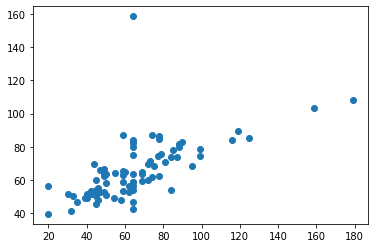

In [17]:
plt.scatter(y_test,y2_pred) #Check that model looks like a 45 degree line ish - this model looks better

In [18]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
lm_df2 = pd.DataFrame(abs(lm2.coef_), X2.columns, columns=['Coefficient'])
lm_df2.sort_values(by=['Coefficient'], ascending=False).head(10)

,Coefficient
vertical_drop,11.444706
base_elev,9.547543
clusters,7.032366
summit_elev,5.950739
Snow Making_ac,5.032051
quad,4.166107
triple,3.508796
trams,3.088119
fastQuads,3.069381
surface,2.732595


**<font color='teal'> When reviewing our new model coefficients, we see `summit_elev` is now in the number two spot. This is also difficult to change from a management prespective and highly correlated with `base_elev` and `vertical_drop`.  This time, rebuild the model without the state features and without the `summit_elev` and without `base_elev`and compare the results. </font>**

#### Model 3

In [19]:
# Declare an explanatory variable, called X2 ,and assign it the result of dropping 'state', Name' and 'AdultWeekend' from the df
X3 = df2.drop(['Name','AdultWeekend','AdultWeekday','daysOpenLastYear','projectedDaysOpen','summit_elev','base_elev'], axis=1)
#X3 = df2.drop(['Name','AdultWeekend','summit_elev','base_elev'], axis=1)
# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y3 = df2.AdultWeekend 
# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = StandardScaler().fit(X3)
# Declare a variable called X2_scaled, and assign it the result of calling the transform() method with parameter X2 
X3_scaled=scaler.transform(X3)
# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y3 = y3.ravel()
# Call the train_test_split() function with the first two parameters set to X2_scaled and y2
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.25, random_state=1)
lm3 = linear_model.LinearRegression()
model3 = lm3.fit(X3_train,y3_train)
y3_pred = model3.predict(X3_test)

In [20]:
ev3=explained_variance_score(y3_test,y3_pred)
mae3=mean_absolute_error(y3_test,y3_pred)
print('explained variance = ' + str(ev3))
print('mean absolute error = ' + str(mae3))
print(lm3.intercept_)

explained variance = 0.397373292627901
mean absolute error = 13.989265818537808
64.26855831385079


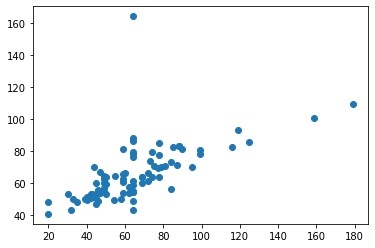

In [21]:
plt.scatter(y_test,y3_pred) #Check that model looks like a 45 degree line ish - this model the same as model 2

<bound method Figure.show of <Figure size 432x288 with 3 Axes>>

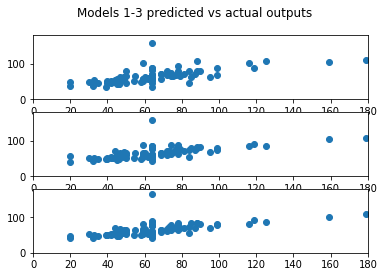

In [44]:
#Compare them all side by side - they look almost exactly the same
fig, axs = plt.subplots(3)
fig.suptitle('Models 1-3 predicted vs actual outputs')
axs[0].scatter(y_test, y_pred)
axs[0].set_xlim(0,180)
axs[0].set_ylim(0,180)
axs[1].scatter(y_test, y2_pred)
axs[1].set_xlim(0,180)
axs[1].set_ylim(0,180)
axs[2].scatter(y_test, y3_pred)
axs[2].set_xlim(0,180)
axs[2].set_ylim(0,180)
fig.show

In [18]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
lm_df3 = pd.DataFrame(abs(lm3.coef_), X3.columns, columns=['Coefficient'])
lm_df3.sort_values(by=['Coefficient'], ascending=False).head(10)

,Coefficient
vertical_drop,10.333574
Snow Making_ac,5.660332
clusters,4.629705
quad,3.877485
triple,3.514672
trams,3.400900
fastQuads,2.767894
averageSnowfall,2.405062
surface,2.346793
fastEight,2.303942


## Identify the Final Model

**<font color='teal'> Review the model performances in the table below and choose the best model for proving insights to Big Mountain management about what features are driving ski resort lift ticket prices. Type your choice in the final markdown cell — you will discuss this selection more in the next step of the guided casptone. </font>**

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | 0.3863084985672324    | 13.77570805047121  |-|
| Model 2. | 0.39468090009546053   | 14.235125947463754  |'state'|
| Model 3. | 0.397373292627901  | 13.989265818537808  |'state','summit_elev','base_elev'|

Model Selection:

In [19]:
print(ev1,mae1,ev2,mae2,ev3,mae3)

0.3863084985672324 13.775708050471213 0.39468090009546053 14.235125947463754 0.397373292627901 13.989265818537808


In [21]:
print('Model 3 has the highest explained variance but also the middle-most mean absolute error making it a viable choice.')

Model 3 has the highest explained variance but also the middle-most mean absolute error making it a viable choice.
